In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('fires.csv')

C:\Users\Saugat\AppData\Local\Temp\ipykernel_8652\4176767329.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fires.csv')


In [4]:
df.head()

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FIRE_NAME       object 
 1   FIRE_SIZE       float64
 2   STATE           object 
 3   LATITUDE        float64
 4   LONGITUDE       float64
 5   FIRE_YEAR       int64  
 6   discovery_date  object 
 7   contain_date    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 114.8+ MB


### Q1. Find the dimensions of the DF. Make the colnames lowercase.

In [6]:
df.shape

(1880465, 8)

In [7]:
df.columns = [x.lower() for x in df.columns]

In [8]:
df.columns

Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')

### Q2. Rename the column `fire_size` to `acres_burned`.

In [9]:
df.rename(columns={'fire_size':'acres_burned'}, inplace = True)

In [10]:
df.columns

Index(['fire_name', 'acres_burned', 'state', 'latitude', 'longitude',
       'fire_year', 'discovery_date', 'contain_date'],
      dtype='object')

### Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON LAKE` -> `Pigeon lake`)

In [11]:
df['fire_name'] = df['fire_name'].str.capitalize()

In [12]:
df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,Fountain,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,Pigeon,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,Slack,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,Deer,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,Stevenot,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


### Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [13]:
df.drop(df[df['acres_burned']<10].index, inplace= True)

In [14]:
df.shape

(274170, 8)

### Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.

In [15]:
df.drop_duplicates(keep='first', inplace = True )

In [16]:
df.shape

(274123, 8)

### Q6. Ensure that the `date` columns have the correct datatype.

In [17]:
df['discovery_date'] = pd.to_datetime(df['discovery_date'])
df['contain_date'] = pd.to_datetime(df['contain_date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274123 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128661 non-null  object        
 1   acres_burned    274123 non-null  float64       
 2   state           274123 non-null  object        
 3   latitude        274123 non-null  float64       
 4   longitude       274123 non-null  float64       
 5   fire_year       274123 non-null  int64         
 6   discovery_date  274123 non-null  datetime64[ns]
 7   contain_date    137376 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB


### Q7. Check for missing values in the `contain_date` column. Find the number.

In [19]:
df[df['contain_date'].isnull()]

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
1566,Seven springs,85.00,MO,36.992500,-92.186111,2005,2005-03-17,NaT
5095,Peppin,64488.00,NM,33.601389,-105.433333,2004,2004-05-15,NaT
5740,Rochelle hills,230.00,WY,43.571667,-105.085833,2005,2005-08-26,NaT
8187,Knife,560.00,AZ,35.132778,-111.399444,2006,2006-05-27,NaT
10883,Grant,190.00,AZ,33.626111,-109.248889,2006,2006-07-19,NaT
...,...,...,...,...,...,...,...,...
1880206,Ranchita,24.20,CA,35.805000,-120.575000,2010,2010-06-21,NaT
1880316,NaN,24.74,CA,35.271667,-118.617967,2013,2013-05-25,NaT
1880352,San marcos,70.00,CA,38.020433,-121.982883,2010,2010-08-23,NaT
1880419,Slaughterhouse,50.00,CA,32.906591,-116.942448,2010,2010-05-29,NaT


In [20]:
df['contain_date'].isna().sum()

136747

#### a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.

In [21]:
df['contain_date'][df['acres_burned']>10000].isna()

16         False
188        False
1505       False
1588       False
3867       False
           ...  
1869553     True
1874306    False
1877519     True
1877889    False
1878523     True
Name: contain_date, Length: 2174, dtype: bool

In [22]:
df['contain_date'][df['acres_burned']>10000].isna().sum()

263

#### b) Check the values of  `contain_date` to see if they are reasonable.

In [23]:
df['contain_date'].nunique()

8479

In [24]:
df['contain_date'].count()

137376

In [26]:
df[df['contain_date']<df['discovery_date']]

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date


#### There are many criteria that determines wether a data is reasonable. In this context, one of the main faactor is wether a dataset is diverse or not which is determined by the percentage of unique value. In the given dataset, the amount of unique value is is more than 6%, the data can be said to be reasonable. Also, the contain date of fire is not less than disovery date which also makes data reasonable.

### Q9. Add the `fire_month` and `days_burning` columns

In [29]:
df['days_burning'] =  (df['contain_date'])-(df['discovery_date'])

In [30]:
df['fire_month'] = df['discovery_date'].dt.month

In [31]:
df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,days_burning,fire_month
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,15 days,10
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,4 days,10
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,0 days,7
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1 days,1
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,1 days,2


### Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?

In [32]:
df['days_burning'].describe()

count                        137376
mean      3 days 06:06:30.566037735
std      16 days 01:16:04.778377856
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max              1881 days 00:00:00
Name: days_burning, dtype: object

### Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?

In [53]:
df_days_busning100 = df['days_burning'][df['acres_burned']>100]

In [55]:
df_days_busning100.head()

16    15 days
17     4 days
39     1 days
116    1 days
117    0 days
Name: days_burning, dtype: timedelta64[ns]

In [34]:
df['days_burning'].info

<bound method Series.info of 16        15 days
17         4 days
25         0 days
37         1 days
39         1 days
            ...  
1880387    0 days
1880399    0 days
1880411    0 days
1880419       NaT
1880441       NaT
Name: days_burning, Length: 274123, dtype: timedelta64[ns]>

In [39]:
df['days_burning'].isna().sum()

136747

In [40]:
df['days_burning'].dropna()

16        15 days
17         4 days
25         0 days
37         1 days
39         1 days
            ...  
1880370    1 days
1880377    5 days
1880387    0 days
1880399    0 days
1880411    0 days
Name: days_burning, Length: 137376, dtype: timedelta64[ns]

In [44]:
# Replace missing or invalid values with a default value (e.g., 0)
df['days_burning'].fillna(pd.Timedelta(0), inplace=True)

# Convert timedelta to number of days and then to integer
df['days_burning_int'] = df['days_burning'].dt.days.astype(int)

In [48]:
df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,days_burning,fire_month,days_burning_int
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,15 days,10,15
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,4 days,10,4
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,0 days,7,0
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1 days,1,1
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,1 days,2,1


<Axes: ylabel='days_burning_int'>

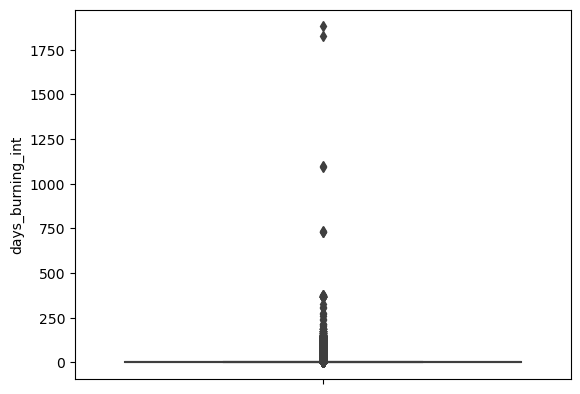

In [52]:
sns.boxplot(data=df, y='days_burning_int')